Importing libraries that we will need to the analysis:

In [1]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import multiprocessing

Reading and visualization of the training and test dataset:

In [2]:
dataset_train = pd.read_csv('./j0002_train.csv')
dataset_test = pd.read_csv('./j0002_X_test.csv')

In [3]:
dataset_train.head()

,feature1,feature2,feature3,feature4,feature5,feature6,target
0,0.474335,0.881640,-2.050543,-1.251935,-1.035151,-1.934367,4
1,-1.034675,1.741801,-1.660629,-1.555989,-0.337553,-2.473838,0
2,-0.563221,-0.688381,-0.318415,-1.845172,0.352366,-0.912928,1
3,-1.268179,2.770688,1.054193,2.830389,0.395093,0.677715,3
4,-1.216380,-0.391267,-2.898931,-0.913074,-2.171857,-2.367490,0


In [4]:
dataset_train['target'].value_counts()

0    427
3    426
1    423
2    419
4    405
Name: target, dtype: int64

As we can se above, the target is composed by 5 different categories (0, 1, 2, 3 & 4), so we will need to use a Random Forest Classifier to train the model. Also, we can see a balance between our values.

In [5]:
dataset_test.head()

,feature1,feature2,feature3,feature4,feature5,feature6
0,0.943723,-2.985473,-0.938218,3.580261,-3.038106,2.080338
1,-0.899819,1.295568,1.274513,0.718186,1.117035,0.463068
2,0.293281,-0.099317,1.874902,-0.589582,1.828441,1.011596
3,-1.134804,0.888585,-1.464499,-1.183056,-0.525729,-1.963822
4,-0.909240,1.575797,0.697212,1.197092,0.486185,0.222644


I will get descriptive statistics for each column:

In [6]:
dataset_train.describe()

,feature1,feature2,feature3,feature4,feature5,feature6,target
count,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000
mean,-0.204656,0.199249,-0.378140,-0.206425,-0.186419,-0.433229,1.980476
std,1.543613,1.614024,1.450548,1.442225,1.501573,1.188791,1.410537
min,-6.683655,-5.383371,-6.147055,-5.653594,-5.912521,-4.433189,0.000000
25%,-1.171340,-0.877386,-1.365990,-1.259403,-1.211685,-1.131944,1.000000
50%,-0.443868,0.320507,-0.439745,-0.176504,-0.195751,-0.406754,2.000000
75%,0.890023,1.321430,0.662898,0.866879,0.851843,0.348593,3.000000
max,4.565547,6.700133,4.157518,4.371912,5.068783,4.016324,4.000000


I divide the model between predictor variables and target and train the model with the library Scikit-Learn and I divide the train model between train and test to compute how good is my model and compare. Later, I will train the model with the best parameters obtained:

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
                                        dataset_train.drop(columns = 'target'),
                                        dataset_train['target'],
                                        random_state = 123)

I create the model with 100 trees, each of them with different sizes  

In [8]:
random_forest_model = RandomForestClassifier(n_estimators=100, 
                                             bootstrap = True, verbose=2,
                                             max_features = 'sqrt')
random_forest_model = random_forest_model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


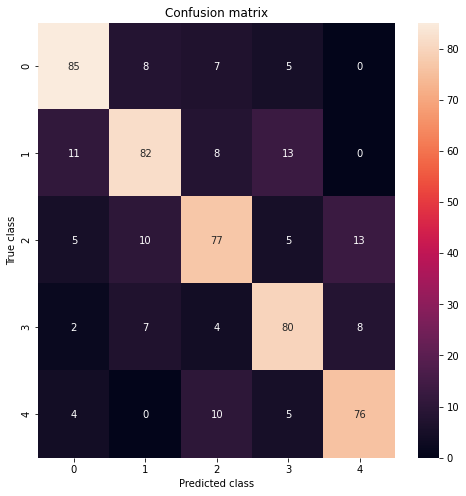

              precision    recall  f1-score   support

           0       0.79      0.81      0.80       105
           1       0.77      0.72      0.74       114
           2       0.73      0.70      0.71       110
           3       0.74      0.79      0.77       101
           4       0.78      0.80      0.79        95

    accuracy                           0.76       525
   macro avg       0.76      0.76      0.76       525
weighted avg       0.76      0.76      0.76       525



In [9]:
LABELS = ["0", "1", "2", "3", "4"]
y_prediction = random_forest_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_prediction)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()
print(classification_report(y_test, y_prediction))

In [10]:
accuracy = accuracy_score(y_true = y_test,
                          y_pred = y_prediction,
                          normalize = True)
print(accuracy)

0.7619047619047619


We can see the model has an accuracy of 76%, which is not very bad, but it could be better.

Now, I will test the model in the test dataset given by the exercise training the model with the whole training dataset:

In [11]:
random_forest_model = RandomForestClassifier(n_estimators=100, 
                                             bootstrap = True, verbose=2,
                                             max_features = 'sqrt')
X_train = dataset_train[['feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6']]
y_train = dataset_train['target']
random_forest_model = random_forest_model.fit(X_train, y_train)

building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished


In [12]:
X_test = dataset_test
y_prediction = random_forest_model.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [13]:
y_prediction[:10]

array([1, 3, 2, 0, 3, 2, 4, 0, 2, 3], dtype=int64)

In [14]:
pd.DataFrame(y_prediction).to_csv('./results.csv', header=False, index=False)